In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
data_set = pd.read_csv("data/diabetes.csv")

In [23]:
data_set.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
data_set.shape

(768, 9)

In [25]:
#Checking is the dataset has null values or not
data_set.isnull().values.any()

False

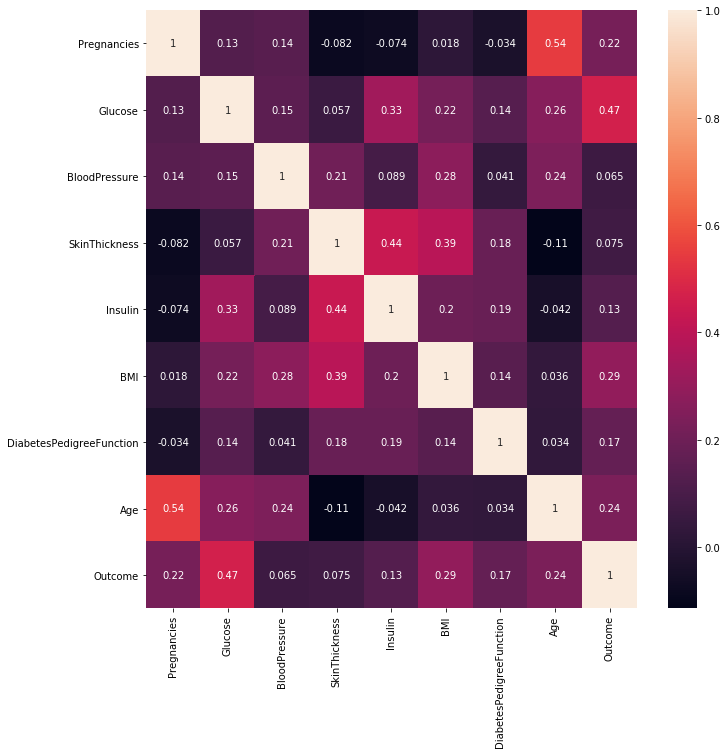

In [26]:
##Correlation metrics
corr_mat = data_set.corr()
corr_mat
plt.figure(figsize=(11,11))
#Plot heat map
sns.heatmap(corr_mat,annot=True)

In [56]:
X = data_set.drop(columns="Outcome",axis=1)
Y = data_set["Outcome"]

In [57]:
#Filling the 0 Values in the X data
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [60]:
#Converting the 0 values of few columns to the 50% (quantile) value
X["Glucose"].replace(0,X["Glucose"].quantile(),inplace=True)

In [67]:
X["BloodPressure"].replace(0,X["BloodPressure"].quantile(),inplace=True)
X["SkinThickness"].replace(0,X["SkinThickness"].quantile(),inplace=True)
X["DiabetesPedigreeFunction"].replace(0,X["DiabetesPedigreeFunction"].quantile(),inplace=True)
X["BMI"].replace(0,X["BMI"].quantile(),inplace=True)
X["Insulin"].replace(0,X["Insulin"].mean(),inplace=True)

In [68]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6      148             72             35   79.799479  33.6   
1            1       85             66             29   79.799479  26.6   
2            8      183             64             23   79.799479  23.3   
3            1       89             66             23   94.000000  28.1   
4            0      137             40             35  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [69]:
###Standardizing the data as the colmuns are of different units
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

C:\Users\eroynab\Documents\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eroynab\Documents\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
X_Scaled.shape

(768, 8)

In [75]:
X_New_Scaled = pd.DataFrame(X_Scaled,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

In [77]:
X_New_Scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.831114 -0.417768  0.167240   
1    -0.844885 -1.205066      -0.528319       0.180566 -0.417768 -0.851551   
2     1.233880  2.016662      -0.693761      -0.469981 -0.417768 -1.331838   
3    -0.844885 -1.073567      -0.528319      -0.469981 -0.265107 -0.633239   
4    -1.141852  0.504422      -2.679076       0.831114  0.530423  1.549885   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [79]:
##Splitting the data for train test split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_New_Scaled, Y, test_size=0.30, random_state=42)

In [80]:
X_train.shape

(537, 8)

In [83]:
#Applying the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
y_pred = RFC.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7445887445887446
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.63      0.65      0.64        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231

[[120  31]
 [ 28  52]]


In [89]:
## Checking the algorithm with GridSearchCV ##
from sklearn.model_selection import GridSearchCV
params = {"n_estimators":[50,100,200,300],"criterion":["gini","entropy"],"random_state":[42,101,303]}
rfc_new = RandomForestClassifier()
clf = GridSearchCV(rfc_new,param_grid=params,verbose=2)
clf.fit(X_train,y_train)

C:\Users\eroynab\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] criterion=gini, n_estimators=50, random_state=42 ................
[CV] . criterion=gini, n_estimators=50, random_state=42, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=42 ................
[CV] . criterion=gini, n_estimators=50, random_state=42, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=42 ................
[CV] . criterion=gini, n_estimators=50, random_state=42, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=101 ...............
[CV]  criterion=gini, n_estimators=50, random_state=101, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=101 ...............
[CV]  criterion=gini, n_estimators=50, random_state=101, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=101 ...............
[CV]  criterion=gini, n_estimators=50, random_state=101, total=   0.0s
[CV] criterion=gini, n_estimators=50, random_state=303 ...............
[CV]  criterion=

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   31.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200, 300], 'criterion': ['gini', 'entropy'], 'random_state': [42, 101, 303]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [90]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=303, verbose=0, warm_start=False)

In [91]:
rfc_new = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=303, verbose=0, warm_start=False)

In [92]:
rfc_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=303, verbose=0, warm_start=False)

In [93]:
y_preds_new = rfc_new.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_preds_new))
print(classification_report(y_test,y_preds_new))
print(confusion_matrix(y_test,y_preds_new))

0.7835497835497836
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.67      0.72      0.70        80

   micro avg       0.78      0.78      0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.79      0.78      0.79       231

[[123  28]
 [ 22  58]]
